# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

In [ ]:
# Part 1:
# Imagine rolling two dice, 𝑑1 and 𝑑2. Let 𝑅𝑚𝑖𝑛 be the lesser value of the two face values. 
# What is the probability of getting a 1, 2, 3, 4, 5, or 6? 
# Which values are more or less likely compared to the roll of a single six-sided die? 
# What is the expected value of 𝑅𝑚𝑖𝑛? 
# Plot the probability and cumulative distribution functions for 𝑅𝑚𝑖𝑛. 
# Compute this by hand and simulate it using the law of large numbers.

[0.30555556 0.25       0.19444444 0.13888889 0.08333333 0.02777778]
2.5277777777777777


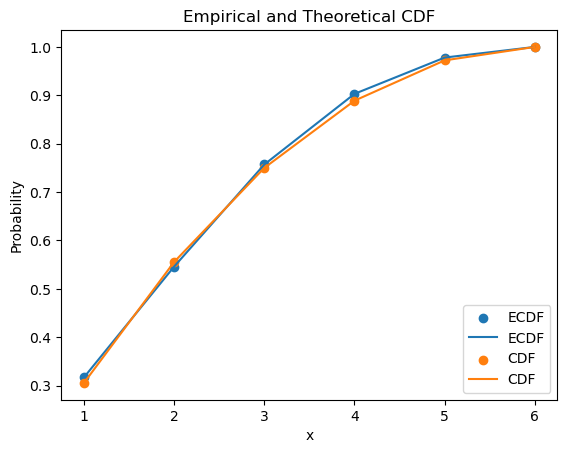

In [12]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

faces = np.array([1, 2, 3, 4, 5, 6]) 

pr = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([faces[i], faces[j]])
        pr[min_ij - 1] += 1
        
pr = pr/36

# print possibility of rolls
# seems like value fo 1 is much more likely (0.3056) than a value of 6 (0.0278)
print(pr)

F = np.cumsum(pr)

expected_value_rmin = np.sum(faces * pr)
print(expected_value_rmin)
# expected value of Rmin: 2.53

N = 1000

d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)


min_roll = [min([d1[i], d2[i]]) for i in range(N)]

ecdf = np.zeros(6)

for i in range(6):
    ecdf[i] = (1 / N) * np.sum(min_roll <= faces[i])


plt.scatter(faces, ecdf, label='ECDF')
plt.plot(faces, ecdf, label='ECDF')
plt.scatter(faces, F, label='CDF')
plt.plot(faces, F, label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')

plt.show()


In [ ]:
# Part 2:
# Imagine rolling three dice, 𝑑1, 𝑑2, and 𝑑3. Let 𝑅𝑚𝑒𝑑 be the middle of the three face values. 
# So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. 
# What is the probability of getting a 1, 2, 3, 4, 5, or 6? 
# Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of 𝑅𝑚𝑒𝑑? 
# Plot the probability and cumulative distribution functions for 𝑅𝑚𝑒𝑑. I recommend using simulations and the law of large numbers.

Median probabilities: {1: 0.076, 2: 0.1856, 3: 0.2364, 4: 0.2428, 5: 0.186, 6: 0.0732}
Expected value of Rmed:  3.4968


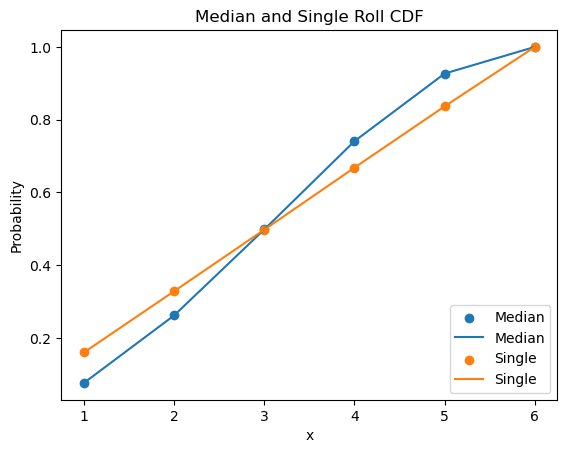

In [20]:
from collections import Counter

faces = np.array([1,2,3,4,5,6]) 
N = 5000

d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
d3 = np.random.choice(faces, size=N)

med_roll = [int(np.median([d1[i], d2[i], d3[i]])) for i in range(N)]

med_counts = Counter(med_roll)
med_probs = {face: med_counts[face] / N for face in faces}
print("Median probabilities:", med_probs)
# shows the pediam probabilities of each faces
# seems like values of 3 and 4 are more likely and values of 1 and 6 are less likely

expected_value = np.sum(med_roll)/N
print('Expected value of Rmed: ', expected_value) # Expected value: 3.4968

ecdf = np.zeros(6)
single = np.zeros(6)

for i in range(6):
    ecdf[i] = (1/N) * np.sum(med_roll <= faces[i])
    single[i] = (1/N) * np.sum(d1 <= faces[i])

expected_value = np.sum(med_roll) / N

plt.scatter(faces, ecdf, label='Median')
plt.plot(faces, ecdf, label='Median')
plt.scatter(faces, single, label='Single')
plt.plot(faces, single, label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()


In [ ]:
# Part 3:
# Imagine rolling a die. 
# If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; 
# if you roll a six, add that number to your total and roll the die again. 
# So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, 
# or twelve sixes and 1 and get 72, and so on. 
# Write code to simulate this process, and determine its expected value using the law of large numbers. 
# What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? 
# I recommend using simulations and the law of large numbers. (Hint: The while loop might be useful in this case.)

                  0
count  50000.000000
mean       4.206420
std        3.251834
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       35.000000


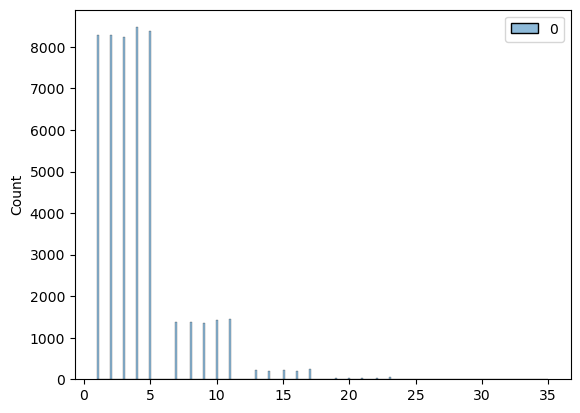

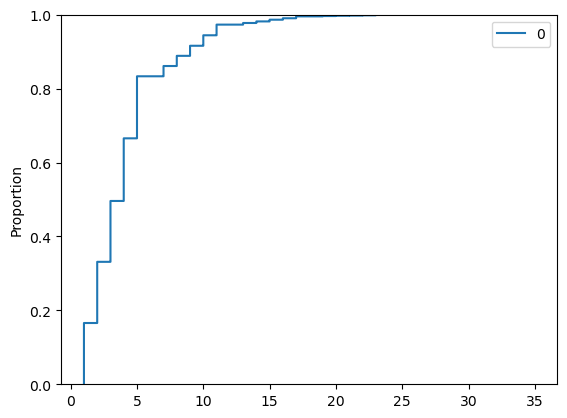

In [24]:
N = 50000
results = []


for i in range(N):
    roll_dice = True
    sum = 0
    
    while roll_dice:
        roll = np.random.choice(faces, size=1)
        sum += roll
        
        if roll < 6:
            results.append(int(sum[0]))
            roll_dice = False

            
results = pd.DataFrame(results)
print(results.describe())

sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()


**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups. 
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [28]:
df = pd.read_csv('./data/diabetes_hw.csv')
df.head()

,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success


In [29]:
# 1. Cross tabulate treatment and outcome.

In [31]:
df['success'] = 0
df.loc[df['outcome'] == 'success', 'success'] = 1

print(pd.crosstab(df['treatment'], df['outcome']), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True, normalize=True), '\n')

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 



In [30]:
# 2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?

In [32]:
print('lifestyle success rate: ', 125/(125+109), '\n')  
print('met success rate: ', 112/(112+120), '\n')
print('rosi success rate: ', 143/(143+90), '\n')

# seems like the rosi treatment has the highest effective rate of 0.6137 (61.37%)

lifestyle success rate:  0.5341880341880342 

met success rate:  0.4827586206896552 

rosi success rate:  0.6137339055793991 



In [ ]:
# 3. Bootstrap the density and distribution of the proportion of successes for each interventions. 
# Create empirical CDF and kernel density plots that are grouped  by treatment type. 
# Which treatment appears to be the most effective?

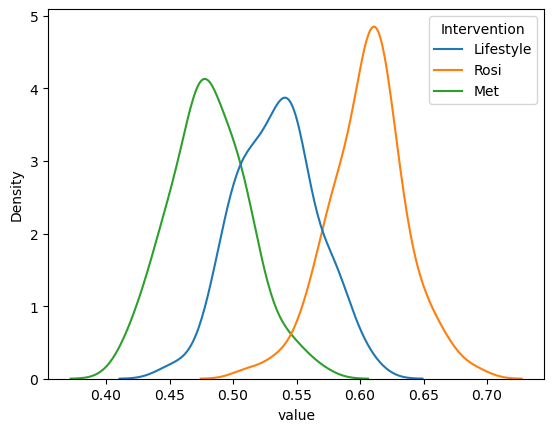

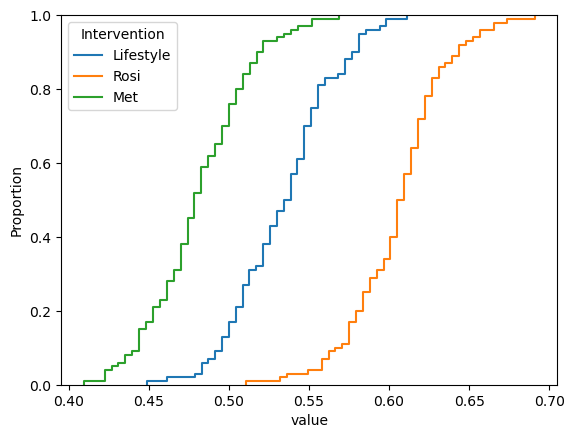

In [38]:
df_lif = df.loc[ df['treatment'] == 'lifestyle', :]
df_ros = df.loc[ df['treatment'] == 'rosi', :]
df_met = df.loc[ df['treatment'] == 'met', :]

S = 100
fx_lif = []
fx_ros = []
fx_met = []

for treatment in range(S):
    df_lif_t = df_lif.sample( df_lif.shape[0], axis=0, replace=True)
    df_ros_t = df_ros.sample( df_ros.shape[0], axis=0, replace=True)
    df_met_t = df_met.sample( df_met.shape[0], axis=0, replace=True)
    
    fx_lif_t = np.mean(df_lif_t['success'])
    fx_ros_t = np.mean(df_ros_t['success'])
    fx_met_t = np.mean(df_met_t['success'])
    
    fx_lif.append(fx_lif_t)
    fx_ros.append(fx_ros_t)
    fx_met.append(fx_met_t)    

gdf_lif = pd.DataFrame({'value': fx_lif, 'Intervention': 'Lifestyle'}) 
gdf_ros = pd.DataFrame({'value': fx_ros, 'Intervention': 'Rosi'})
gdf_met = pd.DataFrame({'value': fx_met, 'Intervention': 'Met'})

gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(data=gdf, x='value', hue = 'Intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue = 'Intervention')
plt.show()


# Still looks like the Rosi treatment has a better efficiency than Lifestyle and Met.

In [ ]:
# 4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the 
# difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?

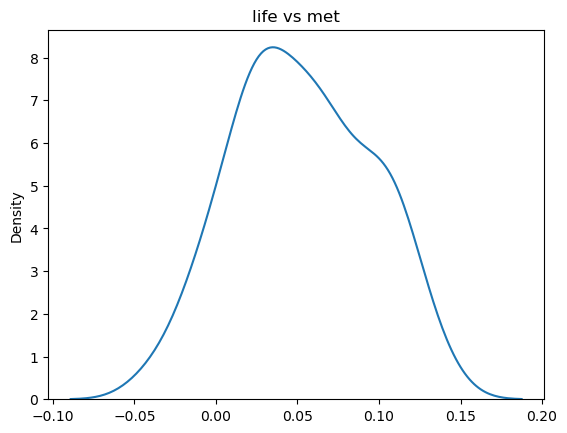

90% Confidence interval, lifestyle minus metformin:  -0.012947612732095543 ,  0.11620247568523426


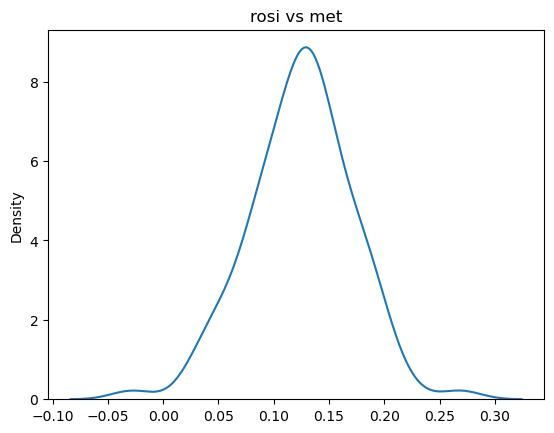

90% Confidence interval, rosi minus metformin:  0.04885304129051357 ,  0.19148475654876423


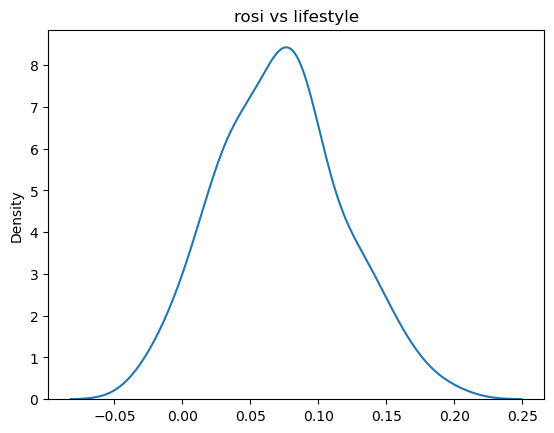

90% Confidence interval, rosi minus lifestyle:  0.002297237812259246 ,  0.14853086827335749


In [44]:
# lifestyle vs met
lif_versus_met = np.array(fx_lif)-np.array(fx_met)
sns.kdeplot(x=lif_versus_met)
plt.title("life vs met")
plt.show()
print('90% Confidence interval, lifestyle minus metformin: ', np.quantile(lif_versus_met, .05), ', ', np.quantile(lif_versus_met, .95))

# rosi vs met
rosi_versus_met = np.array(fx_ros)-np.array(fx_met)
sns.kdeplot(x=rosi_versus_met)
plt.title("rosi vs met")
plt.show()
print('90% Confidence interval, rosi minus metformin: ', np.quantile(rosi_versus_met, .05), ', ', np.quantile(rosi_versus_met, .95))

# rosi vs lifestyle
rosi_versus_lifestyle = np.array(fx_ros)-np.array(fx_lif)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.title("rosi vs lifestyle")
plt.show()
print('90% Confidence interval, rosi minus lifestyle: ', np.quantile(rosi_versus_lifestyle, .05), ', ', np.quantile(rosi_versus_lifestyle, .95))


# For Lifestyle vs Met, there isn't a significant difference, because the 90% confidence interval for that includes zero, since
# it ranges from -0.0129 to 0.116. For Rosi vs Met, the 90% confidence interval does not include zero, but we can see that
# Rosi performs better with a value of 0.0489 than Met with 0.1915. For Rosi vs Lifestyle, the 90% internal does not include zero,
# but we can see that Rosi performs better here as well with a value of 0.0023 as oppposed to Lifestyle with 0.1485.

In [ ]:
# 5. Which treatment appears to be the most effective overall?

There's many other factors that determine the "effectiveness" of a treatment. In terms of health and safety, lifestyle would probably be the best choice of treatment if it is effective to the patient. However, in terms of treatment efficiency based on the analysis

Here is a sincere answer: "It depends. If Lifestyle succeeds, it's probably safer and more effective than using drugs to control diabetes: There can be long-term effects not covered by this study, including damage to other organs or long-run resistance to the drug. If it's possible for a person to change their diet and lifestyle to reverse their need for insulin injections, they might avoid other liver and kidney problems later in life, including dialysis. Leading a healthy and sustainable life, when possible, is better than relying on drugs to reverse some symptoms but not treat the underlying biological and behavioral issues. If lifestyle interventions fail or are unlikely to succeed for medical reasons, then Rosi seems to clearly dominate Met, and can reduce insulin resistance." Notice that what I did not write is: "The bootstrapped numbers suggest Rosi dominates Lifestyle and Met." The first answer is nuanced and considers all the available options for a patient and potential unintended consequences. The second answer focuses merely on comparing distributions. We have an obligation to honestly and competently deal with the world in all of its complexity as much as we can, especially when it impacts the well-being and health of other people.


**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?